# Researching of video games

## Contents:
* [\#1 Downloading dataset](#first)
* [\#2 Data preprocessing](#second)
* [\#3 Exploratory data analysis](#third)
* [\#4 Hypothesis testing](#fourth)

# \#1 Downloading dataset <a class="anchor" id="first"></a>

This dataset is taken from https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/code?datasetId=576&sortBy=voteCount

Structure od dataset:
* Name
* Platform
* Year_of_Release
* Genre
* Publisher
* NA_sales — sales in North America (millions sold)
* EU_sales — sales in Europe (millions sold)
* JP_sales — sales in Japan (millions sold)
* Other_sales — sales in other countries (millions sold)
* Global_sales — sales all over the world (millions sold)
* Critic_Score
* Critic_Count — amount of critic reviews
* User_Score
* User_Count  — amount of user reviews 
* Developer 
* Rating — rating from the ESRB (англ. Entertainment Software Rating Board).

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('games_sales_2016.csv')

In [3]:
df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          51.0          8       322.0  Nintendo      E  
1           NaN           NaN        NaN         NaN       NaN    NaN  
2          82.0          73.0        8.3       709.0  Nintendo      E  
3          80.0          73.0          8       192.0  Nintendo      E  
4           NaN           NaN        NaN         NaN       NaN    NaN  
5           NaN           NaN        NaN         NaN       NaN    NaN  
6          89.0          65.0        8.5       431.0  Nintendo      E  
7          58.0          41.0        6.6       129.0  Nintendo      E  
8          87.0          80.0        8.4       594.0  Nintendo      E  
9           NaN           NaN        NaN         NaN       NaN    NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


This dataset has a lot of null values in different columns.

# \#2 Data preprocessing <a class="anchor" id="second"></a>

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         6704
user_count         9129
developer          6623
rating             6769
dtype: int64

In [7]:
df.loc[(df['name'].isna()) | (df['genre'].isna())]

name platform  year_of_release genre              publisher  na_sales  \
659    NaN      GEN           1993.0   NaN  Acclaim Entertainment      1.78   
14246  NaN      GEN           1993.0   NaN  Acclaim Entertainment      0.00   

       eu_sales  jp_sales  other_sales  global_sales  critic_score  \
659        0.53      0.00         0.08          2.39           NaN   
14246      0.00      0.03         0.00          0.03           NaN   

       critic_count user_score  user_count developer rating  
659             NaN        NaN         NaN       NaN    NaN  
14246           NaN        NaN         NaN       NaN    NaN

In [8]:
# there are only 2 rows so we can definitely remove it
df = df.dropna(subset = ['name', 'genre']).reset_index(drop = True)

### Web scrapping for filling year_of_release

There are almost 300 rows without year of release information, so we shouldn't remove it, so we can insert some median values but we can try to fill it with google search and web scrapping for more accuracy. 

In [9]:
df.loc[(df['year_of_release'].isna())].shape

(269, 16)

In [10]:
import requests, lxml
from bs4 import BeautifulSoup
import time

def google_year(row):
    name, platform = row['name'], row['platform']
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
    query = "{} of {} on {}".format('year of release', name, platform)
    r = requests.get('https://www.google.com/search?q={}'.format(query), headers=headers)
    soup = BeautifulSoup(r.text, 'lxml')
    result = soup.find('div', class_= ['Z0LcW', 'IZ6rdc'])
    time.sleep(1.2)
    try:
        return [float(i) for i in result.text.split()[::-1] if i.isdigit()][0]
    except:
        return np.nan

In [11]:
df.loc[df['year_of_release'].isna(), 'year_of_release'] = df.loc[df['year_of_release'].isna()].apply(google_year, axis = 1)

In [12]:
df.isna().sum()

name                  0
platform              0
year_of_release      37
genre                 0
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8580
critic_count       8580
user_score         6702
user_count         9127
developer          6621
rating             6767
dtype: int64

### Filling rest na values of year_of_release with median values

In [13]:
platform_year_release = df.loc[~(df['year_of_release'].isna())].pivot_table(index='platform', values='year_of_release', aggfunc='median')
platform_year_release

year_of_release
platform                 
2600               1981.0
3DO                1995.0
3DS                2013.0
DC                 2000.0
DS                 2008.0
GB                 1997.0
GBA                2003.0
GC                 2003.0
GEN                1993.0
GG                 1992.0
N64                1999.0
NES                1986.5
NG                 1994.5
PC                 2010.0
PCFX               1996.0
PS                 1998.0
PS2                2004.0
PS3                2011.0
PS4                2015.0
PSP                2009.0
PSV                2014.0
SAT                1996.0
SCD                1994.0
SNES               1994.0
TG16               1995.0
WS                 2000.0
Wii                2009.0
WiiU               2013.0
X360               2010.0
XB                 2004.0
XOne               2015.0

In [14]:
def get_year(row):
    console_dict = {'XB': {'PS2', 'PC'}, 
                    'PS2': {'XB', 'PC'}, 
                    'X360': {'PS3', 'PC'},
                    'PS3': {'X360', 'PC'},
                    'PS4': {'XOne', 'PC'},
                    'XOne': {'PS4', 'PC'},
                    'PC': {'XB', 'X360', 'XOne', 'PS', 'PS2', 'PS3', 'PS4'}}
    platform = row['platform']
    other_plat = set(df.loc[df['name'] == row['name'], 'platform'].tolist())
    
    if platform in console_dict:
        for i in set(console_dict[platform]).intersection(other_plat):
            temp_date = df.loc[(df['name'] == row['name']) & (df['platform'] == i), 'year_of_release'].values[0]
            if temp_date > 0:
                return temp_date
    return platform_year_release.loc[platform, 'year_of_release']

In [15]:
df.loc[df['year_of_release'].isna(), 'year_of_release'] = df.loc[df['year_of_release'].isna()].apply(get_year, axis = 1)

In [16]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8580
critic_count       8580
user_score         6702
user_count         9127
developer          6621
rating             6767
dtype: int64

In [17]:
df['year_of_release'] = df['year_of_release'].astype(int)

### Work with other columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16717 non-null  object 
 2   year_of_release  16717 non-null  int32  
 3   genre            16717 non-null  object 
 4   publisher        16663 non-null  object 
 5   na_sales         16717 non-null  float64
 6   eu_sales         16717 non-null  float64
 7   jp_sales         16717 non-null  float64
 8   other_sales      16717 non-null  float64
 9   global_sales     16717 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(8), int32(1), object(7)
memory usage: 2.0+ MB


In [19]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
df.loc[df['user_score'] == 'tbd'].head()

name platform  year_of_release  \
119                             Zumba Fitness      Wii             2010   
301            Namco Museum: 50th Anniversary      PS2             2005   
520                           Zumba Fitness 2      Wii             2011   
645                              uDraw Studio      Wii             2010   
657  Frogger's Adventures: Temple of the Frog      GBA             2001   

         genre                     publisher  na_sales  eu_sales  jp_sales  \
119     Sports                     505 Games      3.45      2.59       0.0   
301       Misc            Namco Bandai Games      2.08      1.35       0.0   
520     Sports         Majesco Entertainment      1.51      1.03       0.0   
645       Misc                           THQ      1.65      0.57       0.0   
657  Adventure  Konami Digital Entertainment      2.15      0.18       0.0   

     other_sales  global_sales  critic_score  critic_count user_score  \
119         0.66          6.71           NaN           NaN        tbd   
301         0.54          3.98          61.0          21.0        tbd   
520         0.27          2.81           NaN           NaN        tbd   
645         0.20          2.42          71.0           9.0        tbd   
657         0.07          2.39          73.0           4.0        tbd   

     user_count                             developer rating  
119         NaN              Pipeworks Software, Inc.      E  
301         NaN                       Digital Eclipse   E10+  
520         NaN                Majesco Games, Majesco      T  
645         NaN                                   THQ      E  
657         NaN  Konami Computer Entertainment Hawaii      E

In [21]:
# replace 'tbd' score with np.nan
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [22]:
df['user_score'] = df['user_score'].astype(float)

In [23]:
df.loc[df['critic_score'].isna()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

   publisher  na_sales  eu_sales  jp_sales  other_sales  global_sales  \
1   Nintendo     29.08      3.58      6.81         0.77         40.24   
4   Nintendo     11.27      8.89     10.22         1.00         31.37   
5   Nintendo     23.20      2.26      4.22         0.58         30.26   
9   Nintendo     26.93      0.63      0.28         0.47         28.31   
10  Nintendo      9.05     10.95      1.93         2.74         24.67   

    critic_score  critic_count  user_score  user_count developer rating  
1            NaN           NaN         NaN         NaN       NaN    NaN  
4            NaN           NaN         NaN         NaN       NaN    NaN  
5            NaN           NaN         NaN         NaN       NaN    NaN  
9            NaN           NaN         NaN         NaN       NaN    NaN  
10           NaN           NaN         NaN         NaN       NaN    NaN

### Label encoding of categorical columns

In [24]:
training_df = df.copy()

In [25]:
training_df.nunique()

name               11562
platform              31
year_of_release       43
genre                 12
publisher            581
na_sales             402
eu_sales             307
jp_sales             244
other_sales          155
global_sales         629
critic_score          82
critic_count         106
user_score            95
user_count           888
developer           1696
rating                 8
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [27]:
# encode categorial features with labelencoder
training_df['platform'] = label_encoder.fit_transform(training_df['platform'])
training_df['genre'] = label_encoder.fit_transform(training_df['genre'])
training_df['publisher'] = label_encoder.fit_transform(training_df['publisher'])
training_df.loc[~training_df['rating'].isna(), 'rating'] = label_encoder.fit_transform(training_df.loc[~training_df['rating'].isna(), 'rating'])

In [28]:
training_df.head()

name  platform  year_of_release  genre  publisher  \
0                Wii Sports        26             2006     10        361   
1         Super Mario Bros.        11             1985      4        361   
2            Mario Kart Wii        26             2008      6        361   
3         Wii Sports Resort        26             2009     10        361   
4  Pokemon Red/Pokemon Blue         5             1996      7        361   

   na_sales  eu_sales  jp_sales  other_sales  global_sales  critic_score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   critic_count  user_score  user_count developer rating  
0          51.0         8.0       322.0  Nintendo      1  
1           NaN         NaN         NaN       NaN    NaN  
2          73.0         8.3       709.0  Nintendo      1  
3          73.0         8.0       192.0  Nintendo      1  
4           NaN         NaN         NaN       NaN    NaN

In [29]:
training_df.drop(columns=['name', 'developer'], axis=1, inplace=True)

### Filling na values with KNNimputer

In [30]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [31]:
imputer = KNNImputer(n_neighbors=4)

In [32]:
training_df.columns

Index(['platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'rating'],
      dtype='object')

In [33]:
result = imputer.fit_transform(training_df)
result

array([[2.6000e+01, 2.0060e+03, 1.0000e+01, ..., 8.0000e+00, 3.2200e+02,
        1.0000e+00],
       [1.1000e+01, 1.9850e+03, 4.0000e+00, ..., 8.0000e+00, 4.3325e+02,
        1.0000e+00],
       [2.6000e+01, 2.0080e+03, 6.0000e+00, ..., 8.3000e+00, 7.0900e+02,
        1.0000e+00],
       ...,
       [2.0000e+01, 2.0160e+03, 1.0000e+00, ..., 7.4500e+00, 3.3000e+01,
        7.0000e+00],
       [6.0000e+00, 2.0030e+03, 4.0000e+00, ..., 7.2000e+00, 1.0750e+01,
        1.0000e+00],
       [2.0000e+01, 2.0160e+03, 9.0000e+00, ..., 8.0000e+00, 5.4250e+01,
        7.0000e+00]])

In [34]:
temp = pd.DataFrame(result, columns=['platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'rating'])

In [35]:
temp.head()

platform  year_of_release  genre  publisher  na_sales  eu_sales  jp_sales  \
0      26.0           2006.0   10.0      361.0     41.36     28.96      3.77   
1      11.0           1985.0    4.0      361.0     29.08      3.58      6.81   
2      26.0           2008.0    6.0      361.0     15.68     12.76      3.79   
3      26.0           2009.0   10.0      361.0     15.61     10.93      3.28   
4       5.0           1996.0    7.0      361.0     11.27      8.89     10.22   

   other_sales  global_sales  critic_score  critic_count  user_score  \
0         8.45         82.53          76.0         51.00       8.000   
1         0.77         40.24          80.0         60.75       8.000   
2         3.29         35.52          82.0         73.00       8.300   
3         2.95         32.77          80.0         73.00       8.000   
4         1.00         31.37          83.5         56.00       8.025   

   user_count  rating  
0      322.00     1.0  
1      433.25     1.0  
2      709.00     1.0  
3      192.00     1.0  
4      241.00     1.0

In [36]:
temp['rating'] = label_encoder.inverse_transform(temp['rating'].astype(int))

In [37]:
df['critic_score'] = temp['critic_score']
df['critic_count'] = temp['critic_count']
df['user_score'] = temp['user_score']
df['user_count'] = temp['user_count']
df['rating'] = temp['rating']

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16717 non-null  object 
 2   year_of_release  16717 non-null  int32  
 3   genre            16717 non-null  object 
 4   publisher        16663 non-null  object 
 5   na_sales         16717 non-null  float64
 6   eu_sales         16717 non-null  float64
 7   jp_sales         16717 non-null  float64
 8   other_sales      16717 non-null  float64
 9   global_sales     16717 non-null  float64
 10  critic_score     16717 non-null  float64
 11  critic_count     16717 non-null  float64
 12  user_score       16717 non-null  float64
 13  user_count       16717 non-null  float64
 14  developer        10096 non-null  object 
 15  rating           16717 non-null  object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.0+ MB


# \#3 Exploratory data analysis <a class="anchor" id="third"></a>

### \#3.1 Overall

In [39]:
import seaborn as sns
sns.set(rc={'axes.facecolor':'#E6E6E6', 'figure.facecolor':'#E6E6E6'})
import matplotlib.pyplot as plt

In [40]:
df.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16717.000000  16717.000000  16717.000000  16717.000000   
mean       2006.469103      0.263255      0.145010      0.077610   
std           5.913457      0.813475      0.503303      0.308836   
min        1977.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        other_sales  global_sales  critic_score  critic_count    user_score  \
count  16717.000000  16717.000000  16717.000000  16717.000000  16717.000000   
mean       0.047333      0.533462     67.584555     22.681776      7.122532   
std        0.186721      1.547956     11.992943     15.854492      1.263433   
min        0.000000      0.010000     13.000000      3.000000      0.000000   
25%        0.000000      0.060000     60.000000     11.250000      6.450000   
50%        0.010000      0.170000     68.000000     18.000000      7.350000   
75%        0.030000      0.470000     76.000000     29.500000      8.000000   
max       10.570000     82.530000     98.000000    113.000000      9.700000   

         user_count  
count  16717.000000  
mean     106.352575  
std      397.896952  
min        4.000000  
25%       10.500000  
50%       22.000000  
75%       58.750000  
max    10665.000000

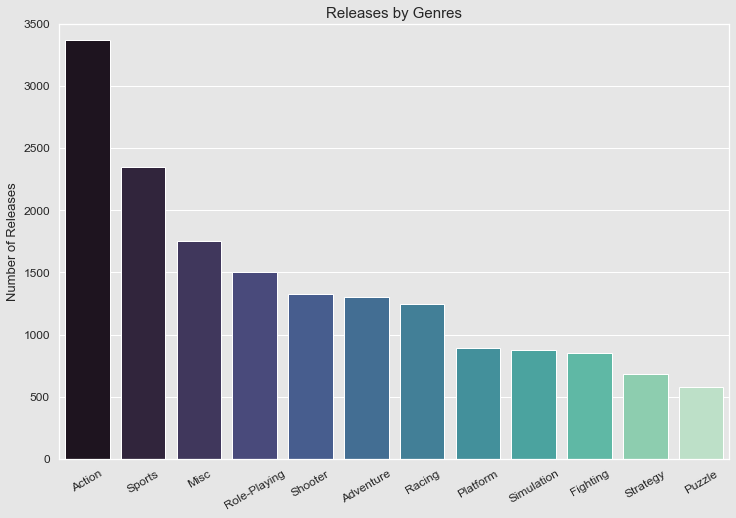

In [41]:
plt.rcParams['figure.figsize']=(12,8)
sns.barplot(data=df['genre'].value_counts().reset_index(), x='index',y='genre',palette='mako')
plt.title('Releases by Genres',fontdict={'fontsize':15})
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.ylim(0, 3500)
plt.xlabel('')
plt.ylabel('Number of Releases',fontdict={'fontsize':13});

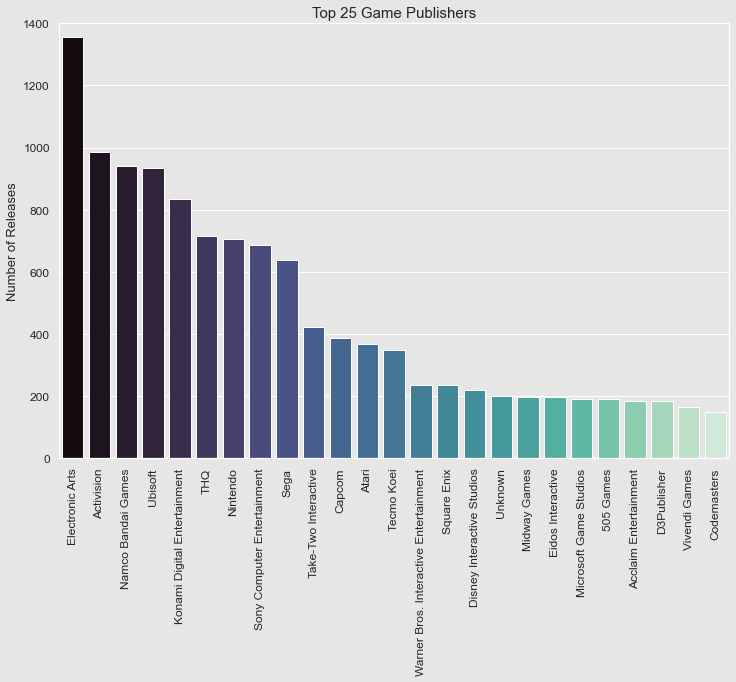

In [42]:
sns.barplot(data=df['publisher'].value_counts().head(25).reset_index(), x='index',y='publisher',palette='mako')
plt.title('Top 25 Game Publishers',fontdict={'fontsize':15})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.ylim(0, 1400)
plt.xlabel('')
plt.ylabel('Number of Releases',fontdict={'fontsize':13});

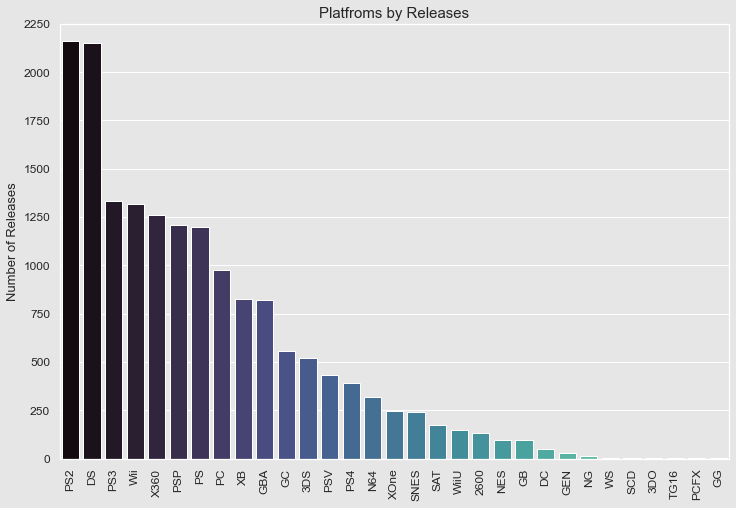

In [43]:
sns.barplot(data=df['platform'].value_counts().reset_index(), x='index',y='platform',palette='mako')
plt.title('Platfroms by Releases',fontdict={'fontsize':15})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.ylim(0, 2250)
plt.xlabel('')
plt.ylabel('Number of Releases',fontdict={'fontsize':13});

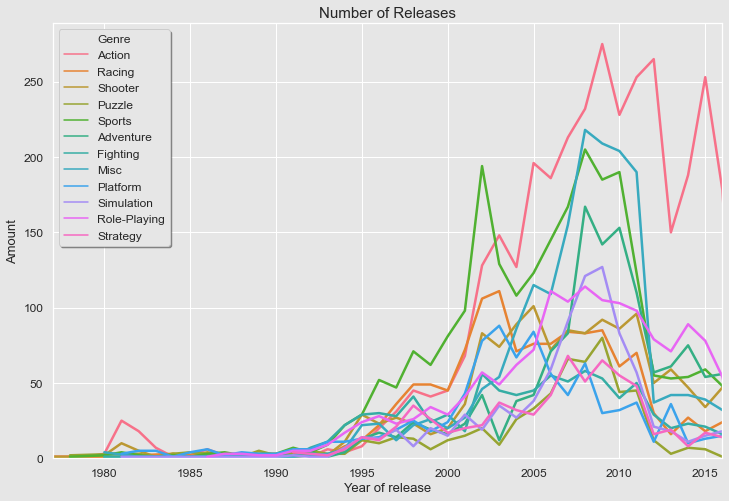

In [44]:
sns.lineplot(data=df.groupby(['year_of_release', 'genre'])['name'].agg('count').reset_index(), 
             x='year_of_release', y='name', hue='genre', linewidth=2.5)
plt.title('Number of Releases', fontsize = 15)
plt.xlabel('Year of release', fontsize=13)
plt.ylabel('Amount', fontsize=13)
plt.legend(title='Genre', fontsize=12, shadow=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1977,2016)
plt.ylim(0,);

In [45]:
# sales by platforms
round(df.groupby('platform')['global_sales'].agg('sum') / df['global_sales'] \
  .agg('sum') * 100, 2).reset_index().sort_values('global_sales', ascending=False) \
  .rename(columns={'global_sales':'%_of_glob_sales'}).head()

platform  %_of_glob_sales
16      PS2            14.08
28     X360            10.90
17      PS3            10.53
26      Wii            10.18
4        DS             9.05

In [46]:
# sales by genres
round(df.groupby('genre')['global_sales'].agg('sum') / df['global_sales'] \
  .agg('sum') * 100, 2).reset_index().sort_values('global_sales', ascending=False) \
  .rename(columns={'global_sales':'%_of_glob_sales'}).head()

genre  %_of_glob_sales
0         Action            19.57
10        Sports            14.94
8        Shooter            11.81
7   Role-Playing            10.48
4       Platform             9.29

### \#3.2 PC, Xbox and Playstation overview

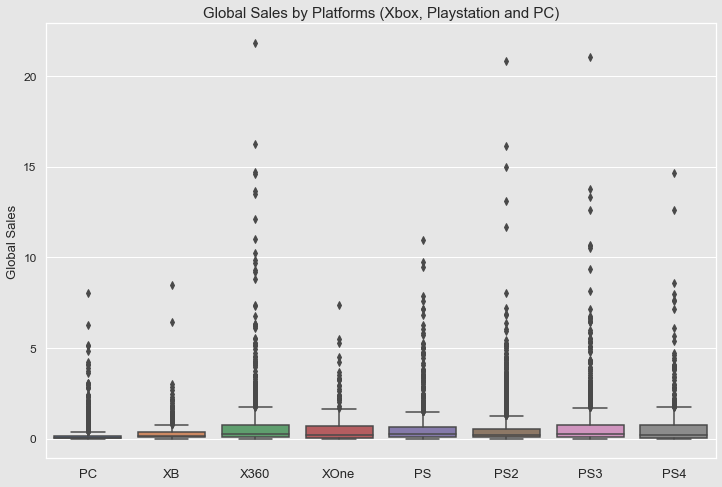

In [47]:
sns.boxplot(x='platform', y='global_sales', 
            data=df.query('platform in ["PC", "XB", "X360", "XOne", \
                                        "PS", "PS2", "PS3", "PS4"]'),
            order=["PC", "XB", "X360", "XOne", \
                                        "PS", "PS2", "PS3", "PS4"])
plt.xlabel('', fontsize=13)
plt.ylabel('Global Sales', fontsize=13)
plt.title('Global Sales by Platforms (Xbox, Playstation and PC)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12);

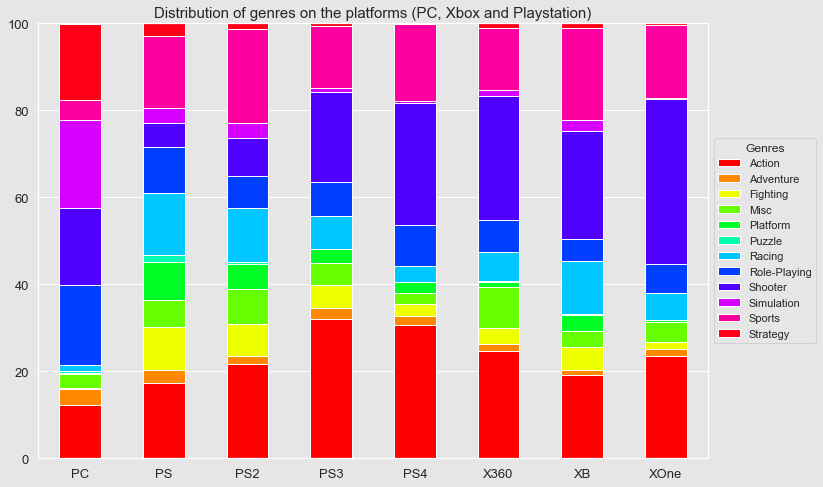

In [48]:
pd.pivot_table(df.query('platform in ["PC", "XB", "X360", "XOne", "PS", "PS2", "PS3", "PS4"]'), 
               values='global_sales', index='platform', 
               columns='genre', aggfunc='sum').fillna(0).T.apply(lambda x: round(x / x.sum() * 100, 2)) \
               .T.plot(kind='bar', stacked=True, colormap='hsv')
plt.legend(title='Genres', loc=5, bbox_to_anchor=(0.67, 0.25, 0.5, 0.5))
plt.title('Distribution of genres on the platforms (PC, Xbox and Playstation)', fontsize=15)
plt.xlabel('')
plt.ylim(0,100)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13);

In [49]:
xb_ps_pc = df.query("platform in ['PS', 'PS2', 'PS3', 'PS4', 'XB', 'X360', 'XOne']")

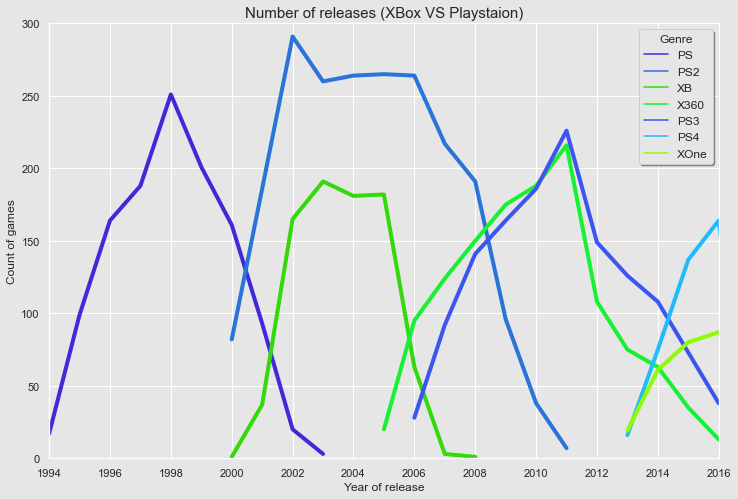

In [50]:
sns.lineplot(data=xb_ps_pc.groupby(['year_of_release', 'platform'])['name'].agg('count').reset_index(), 
             x='year_of_release', y='name', hue='platform', linewidth=4,
             palette=['#4029D9', '#2973D9', '#33D90B', '#18F034', '#3A55F0', '#21BAFC', '#8EFC03'])
plt.title('Number of releases (XBox VS Playstaion)', fontsize = 15)
plt.xlabel('Year of release', fontsize=12)
plt.ylabel('Count of games', fontsize=12)
plt.xticks(np.arange(1994, 2017, 2))
plt.xlim(1994,2016)
plt.ylim(0,300)
plt.legend(title='Genre', fontsize=12, shadow=True);

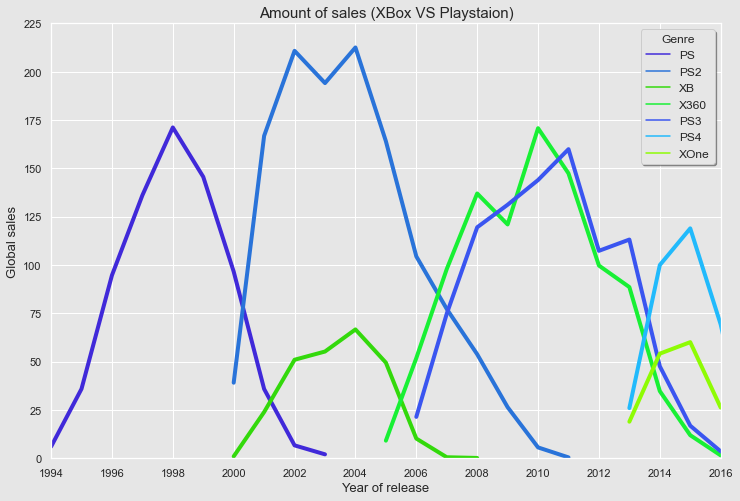

In [51]:
sns.lineplot(data=xb_ps_pc.groupby(['year_of_release', 'platform'])['global_sales'].agg('sum').reset_index(), 
             x='year_of_release', y='global_sales', hue='platform', linewidth=4,
             palette=['#4029D9', '#2973D9', '#33D90B', '#18F034', '#3A55F0', '#21BAFC', '#8EFC03'])
plt.title('Amount of sales (XBox VS Playstaion)', fontsize = 15)
plt.xlabel('Year of release', fontsize=13)
plt.ylabel('Global sales', fontsize=13)
plt.xticks(np.arange(1994, 2017, 2))
plt.xlim(1994,2016)
plt.ylim(0,225)
plt.legend(title='Genre', fontsize=12, shadow=True);

As we can see only Xbox 360 has an almost equal number of releases and amount of sales.

### \# 3.3 Top publishers and famous shooters overview

In [52]:
# top 10 titles by sales
df.groupby(['name', 'genre', 'publisher'])['global_sales'].agg('sum').reset_index() \
  .sort_values('global_sales', ascending=False).head(10)

name         genre             publisher  \
11435                      Wii Sports        Sports              Nintendo   
3858               Grand Theft Auto V        Action  Take-Two Interactive   
9702                Super Mario Bros.      Platform              Nintendo   
10104                          Tetris        Puzzle              Nintendo   
5781                   Mario Kart Wii        Racing              Nintendo   
11437               Wii Sports Resort        Sports              Nintendo   
7624         Pokemon Red/Pokemon Blue  Role-Playing              Nintendo   
1297          Call of Duty: Black Ops       Shooter            Activision   
1304   Call of Duty: Modern Warfare 3       Shooter            Activision   
6976            New Super Mario Bros.      Platform              Nintendo   

       global_sales  
11435         82.53  
3858          56.57  
9702          45.31  
10104         35.84  
5781          35.52  
11437         32.77  
7624          31.37  
1297          30.82  
1304          30.59  
6976          29.80

In [53]:
def search_title(pub, data=df):
    return data.loc[data['publisher'] == pub].groupby('name')['global_sales'] \
  .agg('sum').reset_index().sort_values('global_sales', ascending=False).head(1)['name'].values[0]

def sale_of_title(name, data=df):
    return data.loc[data['name'] == name].groupby('name')['global_sales'].agg('sum').values[0]

In [54]:
# top 5 publishers with their best titles
top_pub_df = df.groupby('publisher')['global_sales'].agg('sum').reset_index() \
  .sort_values('global_sales', ascending=False).rename(columns={'global_sales':'sales'}).head(5)
top_pub_df['percentage_of_total'] = round(top_pub_df['sales'] / df.global_sales.sum() * 100, 2)
top_pub_df['best_title'] = top_pub_df['publisher'].apply(search_title)
top_pub_df['sale_of_title'] = top_pub_df['best_title'].apply(sale_of_title)
top_pub_df.set_index(pd.Index(range(1,6)), inplace=True)
top_pub_df.loc['Total'] = pd.Series(top_pub_df.sum(), index=['sales', 'percentage_of_total', 'sale_of_title'])
top_pub_df.fillna('-', inplace=True)
top_pub_df


publisher    sales  percentage_of_total  \
1                         Nintendo  1788.81                20.06   
2                  Electronic Arts  1116.96                12.52   
3                       Activision   731.16                 8.20   
4      Sony Computer Entertainment   606.48                 6.80   
5                          Ubisoft   471.61                 5.29   
Total                            -  4715.02                52.87   

                            best_title  sale_of_title  
1                           Wii Sports          82.53  
2                              FIFA 15          17.34  
3              Call of Duty: Black Ops          30.82  
4               Gran Turismo 3: A-Spec          14.98  
5      Assassin's Creed IV: Black Flag          13.02  
Total                                -         158.69

Top 5 publishers have more than 52% of all sales!

In [55]:
# Nintendo sales by genres
round((df.loc[df['publisher'] == 'Nintendo'].groupby('genre')['global_sales'] \
         .agg('sum') / df.loc[df['publisher'] == 'Nintendo']['global_sales'] \
         .sum() * 100)).reset_index().sort_values('global_sales', ascending=False) \
         .rename(columns={'global_sales':"%_of_total_sales"}).head()

genre  %_of_total_sales
4       Platform              24.0
7   Role-Playing              16.0
10        Sports              12.0
3           Misc              10.0
6         Racing               8.0

In [56]:
# Electronic Arts sales by genres
round((df.loc[df['publisher'] == 'Electronic Arts'].groupby('genre')['global_sales'] \
         .agg('sum') / df.loc[df['publisher'] == 'Electronic Arts']['global_sales'] \
         .sum() * 100)).reset_index().sort_values('global_sales', ascending=False) \
         .rename(columns={'global_sales':"%_of_total_sales"}).head()

genre  %_of_total_sales
10      Sports              43.0
8      Shooter              15.0
6       Racing              13.0
0       Action              10.0
9   Simulation               8.0

In [57]:
# Activision sales by genres
round((df.loc[df['publisher'] == 'Activision'].groupby('genre')['global_sales'] \
         .agg('sum') / df.loc[df['publisher'] == 'Activision']['global_sales'] \
         .sum() * 100)).reset_index().sort_values('global_sales', ascending=False) \
         .rename(columns={'global_sales':"%_of_total_sales"}).head()

genre  %_of_total_sales
8        Shooter              42.0
0         Action              19.0
3           Misc              10.0
10        Sports              10.0
7   Role-Playing               6.0

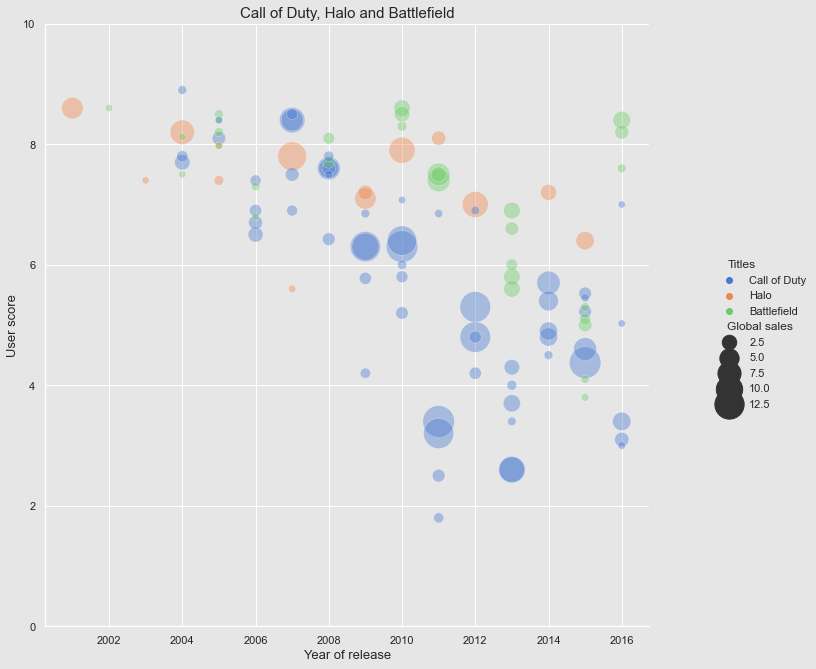

In [58]:
shooting_df = df.loc[((df['name'].str.contains('Call of Duty')) & (df['publisher'] == 'Activision')) |
                    ((df['name'].str.contains('Battlefield')) & (df['publisher'] == 'Electronic Arts')) |
                    ((df['name'].str.contains('Halo')) & (df['publisher'] == 'Microsoft Game Studios'))]

g = sns.relplot(x="year_of_release", y="user_score", hue='publisher', size='global_sales',
            sizes=(50, 1000), alpha=.4, palette="muted",
            height=9, 
            data=shooting_df)
g._legend.texts[0].set_text('Titles')
g._legend.texts[1].set_text('Call of Duty')
g._legend.texts[2].set_text('Halo')
g._legend.texts[3].set_text('Battlefield')
g._legend.texts[4].set_text('Global sales')

plt.title('Call of Duty, Halo and Battlefield', fontsize=15)
plt.ylim(0,10)
plt.ylabel('User score', fontsize=13)
plt.xlabel('Year of release', fontsize=13);

In [59]:
def find_platform(pub, data=shooting_df):
    return data.loc[data['publisher'] == pub].sort_values('global_sales', ascending=False) \
               .head(1)['platform'].values[0]
def find_shooter(pub, data=shooting_df):
    return data.loc[data['publisher'] == pub].sort_values('global_sales', ascending=False) \
               .head(1)['name'].values[0]

In [60]:
shooting = shooting_df.groupby('publisher')['user_score'].agg(['count', 'mean']) \
                    .reset_index().rename(columns={'count':'amount_of_titles', 'mean':'avg_user_score'}) 
shooting['title_series'] = ['Call of Duty', 'Halo', 'Battlefield']
shooting['avg_critic_score'] = shooting_df.groupby('publisher')['critic_score'].agg('mean').values
shooting['all_sales'] = shooting_df.groupby('publisher')['global_sales'].agg('sum').values
shooting = shooting[['publisher', 'title_series', 'amount_of_titles', 'avg_user_score', 'avg_critic_score',
       'all_sales']]
shooting['best_selling_platform'] = shooting['publisher'].apply(find_platform)
shooting['best_selling_title'] = shooting['publisher'].apply(find_shooter)
shooting

publisher  title_series  amount_of_titles  avg_user_score  \
0              Activision  Call of Duty                62        5.728629   
1         Electronic Arts          Halo                30        7.113333   
2  Microsoft Game Studios   Battlefield                14        7.419643   

   avg_critic_score  all_sales best_selling_platform  \
0         77.120968     253.54                  X360   
1         81.666667      53.62                  X360   
2         86.053571      66.66                  X360   

               best_selling_title  
0  Call of Duty: Modern Warfare 3  
1                   Battlefield 3  
2                          Halo 3

Despite low user ratings, Activision's current game sales are huge compared to other well-known shooters.

### \#3.4 Region differences and other interesting findings

In [61]:
def regions(column, region_sales, data=df):
    return data.groupby(column)[region_sales].agg('sum').reset_index() \
               .sort_values(region_sales, ascending=False)[column].values[0]

In [62]:
# region differences
region_table = {}
column_list = ['genre', 'platform', 'name', 'publisher']
for i in df.iloc[:, 5:10]:
    region_temp = []
    for j in column_list:
        region_temp.append(regions(j, i))
    region_table[i.split('_')[0]] = region_temp

pd_region_table = pd.DataFrame(region_table).T
pd_region_table.columns = ['fav_genre', 'fav_platform', 'fav_title', 'fav_publisher']
pd_region_table

fav_genre fav_platform                      fav_title  \
na            Action         X360                     Wii Sports   
eu            Action          PS2                     Wii Sports   
jp      Role-Playing           DS       Pokemon Red/Pokemon Blue   
other         Action          PS2  Grand Theft Auto: San Andreas   
global        Action          PS2                     Wii Sports   

          fav_publisher  
na             Nintendo  
eu             Nintendo  
jp             Nintendo  
other   Electronic Arts  
global         Nintendo

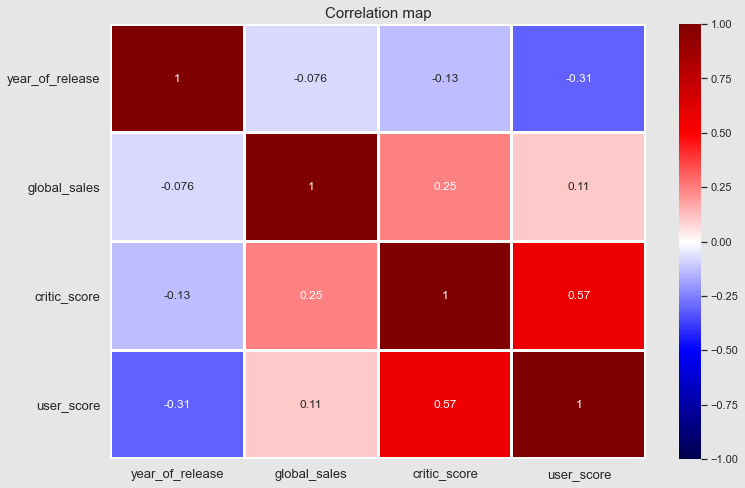

In [63]:
sns.heatmap(df[['year_of_release', 'global_sales', 'critic_score', 'user_score']].corr(), 
            annot=True, linewidth=2, vmin=-1, vmax=1, cmap='seismic')
plt.title('Correlation map', fontsize=15)
plt.yticks(rotation=0, fontsize=13)
plt.xticks(rotation=0, fontsize=13);

We can observe there is no linear correlation between scoring and sales volume.

In [64]:
df['score_diff'] = df['user_score'] * 10 - df['critic_score']

In [65]:
df[['name', 'platform', 'year_of_release', 'genre', 'publisher',
    'critic_score', 'user_score', 'score_diff']].sort_values('score_diff', ascending=False).head(5)

name platform  year_of_release      genre  \
5824        Shrek Swamp Kart Speedway      GBA             2002     Racing   
15989             Antz Extreme Racing       XB             2002     Racing   
14748  The Island of Dr. Frankenstein      Wii             2009  Adventure   
9479                Shrek Super Party       XB             2002       Misc   
15434                  Chicken Hunter       DS             2007    Shooter   

                publisher  critic_score  user_score  score_diff  
5824       TDK Mediactive          27.0        8.90        62.0  
15989  Empire Interactive          35.0        8.70        52.0  
14748    Storm City Games          26.0        7.50        49.0  
9479       TDK Mediactive          33.0        8.00        47.0  
15434       Phoenix Games          39.0        8.45        45.5

Unfortunately, as we can see critics don't like Shrek, two games with that character have a huge critic difference.

In [66]:
df[['name', 'platform', 'year_of_release', 'genre', 'publisher',
    'critic_score', 'user_score', 'score_diff']].sort_values('score_diff', ascending=False).tail(5)

name platform  year_of_release     genre  \
5378          Company of Heroes 2       PC             2013  Strategy   
8265                Madden NFL 17     X360             2016    Sports   
5009                      FIFA 17     X360             2016    Sports   
9970                Madden NFL 17      PS3             2016    Sports   
10482  Thrillville: Off the Rails      PSP             2007  Strategy   

             publisher  critic_score  user_score  score_diff  
5378               THQ          80.0         2.1       -59.0  
8265   Electronic Arts          66.0         0.7       -59.0  
5009   Electronic Arts          78.0         1.7       -61.0  
9970   Electronic Arts          64.5         0.2       -62.5  
10482        LucasArts          72.0         0.6       -66.0

But at the same time critics are delighted with sport simulators with different digits in the titles.

In [67]:
df.groupby('genre')['score_diff'].agg(['min', 'median', 'max'])

min  median    max
genre                             
Action       -55.75    4.25  42.00
Adventure    -51.75    6.50  49.00
Fighting     -45.00    6.50  31.00
Misc         -46.00    3.00  47.00
Platform     -55.50    4.00  37.75
Puzzle       -46.50    4.00  33.00
Racing       -55.25    2.75  62.00
Role-Playing -48.00    4.00  37.00
Shooter      -56.00    2.00  45.50
Simulation   -43.00    5.50  41.00
Sports       -62.50    2.00  45.00
Strategy     -66.00    4.00  39.00

Users give a little bit higher scores rather than critics

# \#4 Hypothesis testing <a class="anchor" id="fourth"></a>

We will use bootstrapping for hypothesis testing

In [68]:
from tqdm.auto import tqdm
from scipy import stats

In [69]:
def get_bootstrap(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1 - samples_2))  # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = stats.norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = stats.norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins=50)
    plt.style.use('ggplot')
    plt.vlines(ci, ymin=0, ymax=50, linestyle='--', colors='black')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"ci": ci, "p_value": p_value}

### \#4.1 The average user ratings of the Xbox One and Playstation 4 platforms are the same

**H<sub>0</sub>**: "The average user ratings of the Xbox One and Playstation 4 platforms are equal". <br>
**H<sub>1</sub>**: "The average user ratings of the Xbox One and Playstation 4 platforms are different". <br>
**Alpha**: 0.05

  0%|          | 0/10000 [00:00<?, ?it/s]

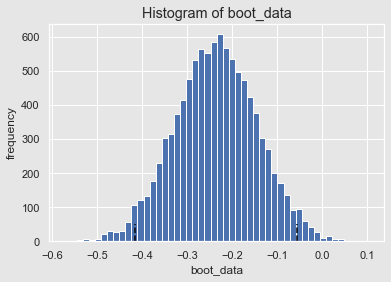

{'ci':               0
 0.025 -0.415013
 0.975 -0.055916,
 'p_value': 0.009928416414943438}

In [70]:
plt.rcParams['figure.figsize']=(6,4)
get_bootstrap(df.query('platform == "XOne"')['user_score'], 
              df.query('platform == "PS4"')['user_score'], 
              boot_it=10000, 
              statistic=np.mean, 
              bootstrap_conf_level=0.95)

We reject the null hypothesis, because our p-value is less than our alpha and CI doesn't include zero.

### \#4.2 The average user and critic ratings are the same

**H<sub>0</sub>**: "The average user and critic ratings are equal". <br>
**H<sub>1</sub>**: "The average user and critic ratings are different". <br>
**Alpha**: 0.05

  0%|          | 0/10000 [00:00<?, ?it/s]

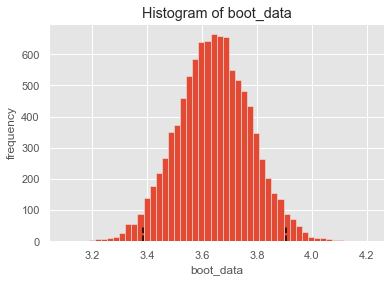

{'ci':               0
 0.025  3.384522
 0.975  3.904337,
 'p_value': 5.74566758457748e-164}

In [71]:
get_bootstrap(df['user_score']*10, 
              df['critic_score'],
              boot_it=10000, 
              statistic=np.mean, 
              bootstrap_conf_level=0.95)

We reject the null hypothesis, because our p-value is less than our alpha and CI doesn't include zero.

### \#4.3 Checking ratings of 2 big publishers

In [72]:
df.groupby('publisher')['score_diff'].agg(['count', 'mean']) \
  .reset_index().sort_values('count', ascending=False).head(2) \
  .rename(columns={'count':'count_of_releases', 'mean':'avg_score_difference'})

publisher  count_of_releases  avg_score_difference
139  Electronic Arts               1356             -3.348267
21        Activision                985             -0.847462

#### \#4.3.1 The average user and critic ratings are the same (publisher = Electronic Arts)

**H<sub>0</sub>**: "The average user and critic ratings are equal (publisher = Electronic Arts)". <br>
**H<sub>1</sub>**: "The average user and critic ratings are different (publisher = Electronic Arts)". <br>
**Alpha**: 0.05

  0%|          | 0/10000 [00:00<?, ?it/s]

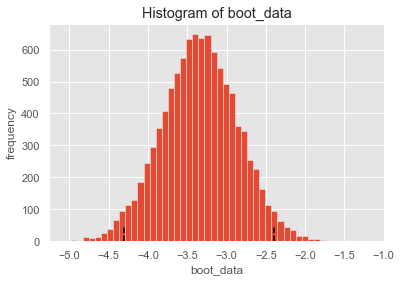

{'ci':               0
 0.025 -4.310122
 0.975 -2.402277,
 'p_value': 4.942179648038542e-12}

In [73]:
get_bootstrap(df.query('publisher == "Electronic Arts"')['user_score']*10, 
              df.query('publisher == "Electronic Arts"')['critic_score'],
              boot_it=10000, 
              statistic=np.mean, 
              bootstrap_conf_level=0.95)

We reject the null hypothesis, because our p-value is less than our alpha and CI doesn't include zero.

#### \#4.3.2 The average user and critic ratings are the same (publisher = Activision)

**H<sub>0</sub>**: "The average user and critic ratings are equal (publisher = Activision)". <br>
**H<sub>1</sub>**: "The average user and critic ratings are different (publisher = Activision)". <br>
**Alpha**: 0.05

  0%|          | 0/10000 [00:00<?, ?it/s]

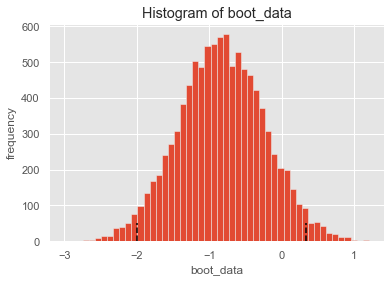

{'ci':               0
 0.025 -1.995958
 0.975  0.332240,
 'p_value': 0.1602725650862873}

In [74]:
get_bootstrap(df.query('publisher == "Activision"')['user_score']*10, 
              df.query('publisher == "Activision"')['critic_score'],
              boot_it=10000, 
              statistic=np.mean, 
              bootstrap_conf_level=0.95)

We can't reject the null hypothesis, because our p-value is more than our alpha and CI includes zero.